<h1>Predicting Diabetes Progression Using Deep Learning</h1>

<h3>Objective</h3>
<p>Objective: You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.</p>

<h3>Step 1: Importing files</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 2: Loading and Preprocessing </h3>

<p>*Load the Diabetes dataset from sklearn.datasets.<br>
*Convert it into a pandas DataFrame for easier manipulation.<br>
*Check for missing values and handle them (though the sklearn dataset typically has none).<br>
*Normalize/Standardize features using StandardScaler to improve ANN training stability.</p>

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [7]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [9]:
# Check for missing values
print(X.isnull().sum())

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [11]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3 style="color:red">Summary of Preprocessing</h3>
<p>The Diabetes dataset was loaded from the sklearn.datasets library and converted into a pandas DataFrame to facilitate easier data handling and analysis. A check for missing values was conducted to ensure data completeness — none were found, as the dataset is clean by default.
Next, the feature variables were normalized/standardized using the StandardScaler from sklearn.preprocessing. This step ensures that all features have a mean of 0 and a standard deviation of 1, which helps the Artificial Neural Network (ANN) train more efficiently and converge faster by preventing features with larger numeric ranges from dominating the learning process.</p>

<h3>Step 3: Exploratory Data Analysis (EDA)</h3>

<p>*View dataset shape, summary statistics, and correlations.<br>
*Plot distributions of features and the target variable.<br>
*Use scatter plots or pair plots to visualize relationships between key features and the target.</p>

In [13]:
# View Dataset Shape
print("Dataset shape:", X.shape)

Dataset shape: (442, 10)


In [15]:
# View Summary Statistics
print(X.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [17]:
# View Correlation Matrix
corr_matrix = X.corr()
print(corr_matrix)

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270774  0.301731  
sex  0.332115  0.149916  0.208133  
bmi  0.413807  0.446157  0.388680  
bp   0.2

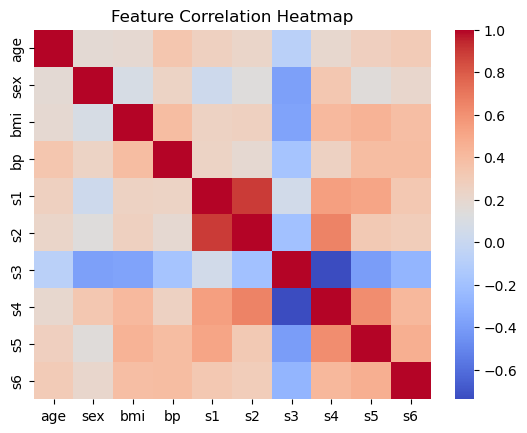

In [19]:
# Target distribution
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression Target")
# Correlation heatmap
sns.heatmap(pd.DataFrame(X_scaled, columns=diabetes.feature_names).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

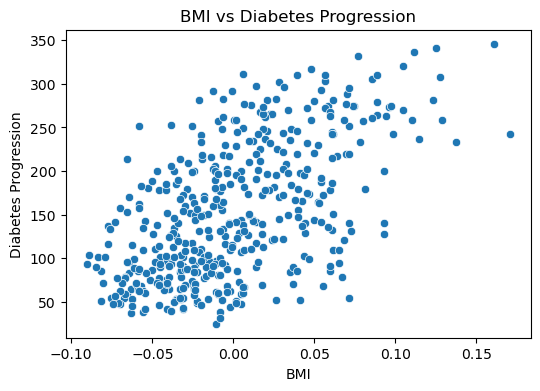

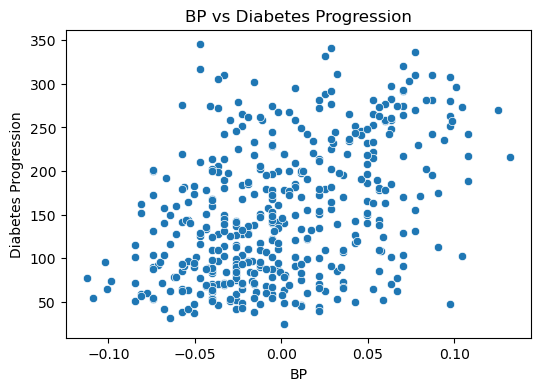

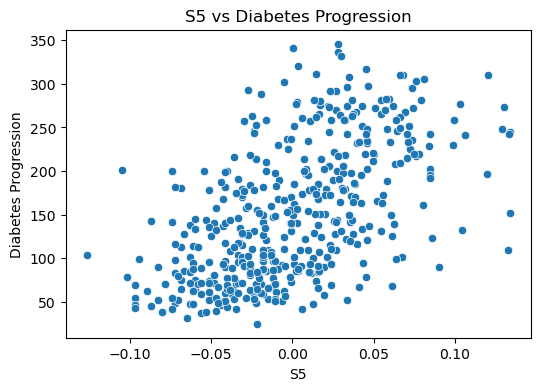

In [23]:
#Scatter plots
# Key features to plot
key_features = ['bmi', 'bp', 's5']
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f"{feature.upper()} vs Diabetes Progression")
    plt.xlabel(feature.upper())
    plt.ylabel("Diabetes Progression")
    plt.show()

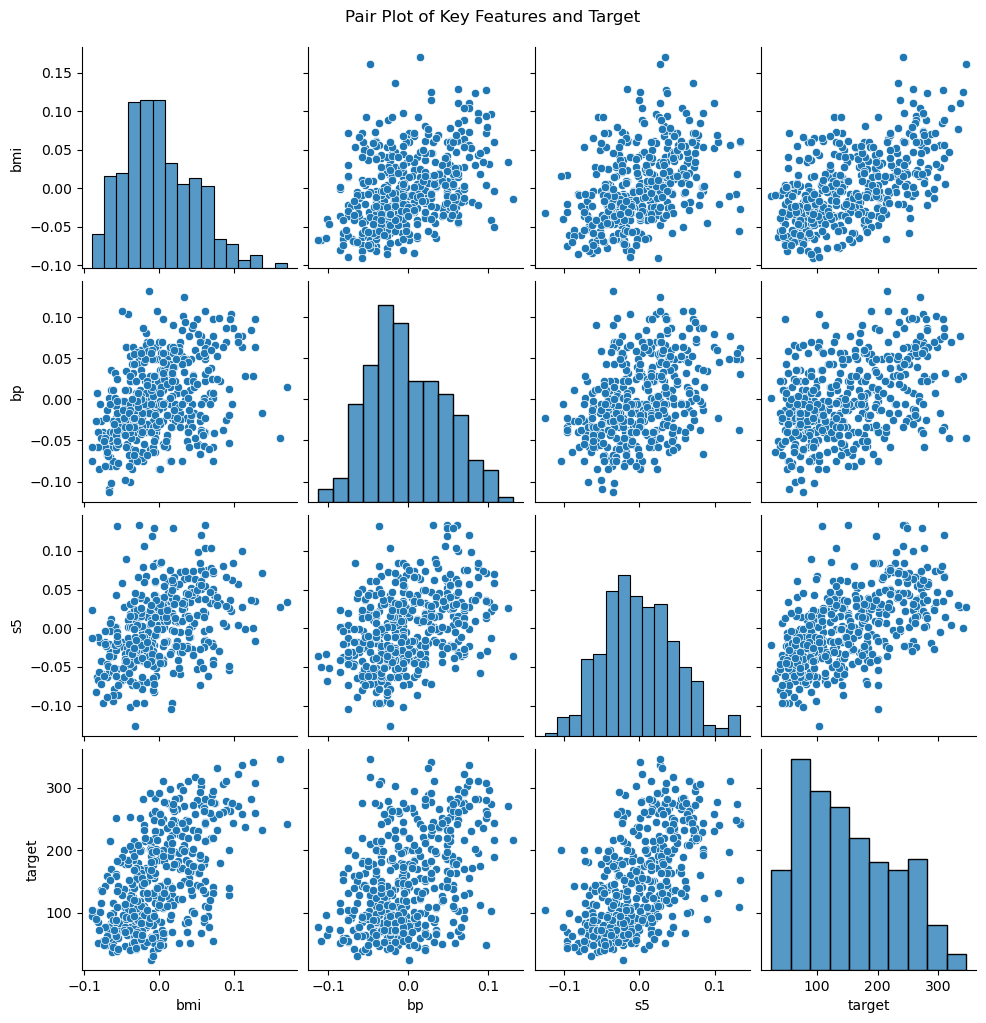

In [25]:
# Pair plot
# Select key features and target
pairplot_features = X[key_features].copy()
pairplot_features['target'] = y  # add target column
sns.pairplot(pairplot_features, kind='scatter')
plt.suptitle("Pair Plot of Key Features and Target", y=1.02)
plt.show()

<h3 style="color:red">Analysis of EDA</h3>
<p>The Diabetes dataset was examined to understand its structure and feature characteristics. The dataset contains 442 samples and 10 independent variables, representing various physiological measurements related to diabetes progression.<br>
    
Using summary statistics (describe()), key insights such as the mean, standard deviation, minimum, and maximum values for each feature were obtained, helping to understand the data distribution and scale of variables.<br>

A correlation matrix was then computed to identify relationships between the features and the target variable. This analysis revealed which features have stronger positive or negative associations, providing valuable insights into which factors may influence diabetes progression more significantly.</p>
<p>The correlation heatmap reveals relationships among features and highlights which variables are more strongly associated with the target. Features such as BMI and blood pressure show notable correlation with diabetes progression, providing insights for predictive modeling.</p>
<p>Scatter plots show that BMI and blood pressure have a positive relationship with diabetes progression, indicating they are key predictors. The pair plot confirms these trends and highlights correlations among features, supporting their importance in modeling diabetes progression.</p>

<h3>Step 4: Building the ANN Model </h3>

<p>*Use Keras (TensorFlow) to build a simple ANN.<br>
*Include at least one hidden layer.<br>
*Use ReLU activation for hidden layers and linear activation for output (since it’s regression).</p>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


<h3>Step 5: Training the ANN Model </h3>

<p>*Split dataset using train_test_split.<br>
*Compile the model with MSE loss and Adam optimizer.<br>
*Train and visualize the loss curve.</p>

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 31425.2207 - mae: 158.3723 - val_loss: 22260.3652 - val_mae: 133.2949
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31034.0391 - mae: 157.2174 - val_loss: 21922.5898 - val_mae: 132.0876
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30516.9922 - mae: 155.6607 - val_loss: 21432.7715 - val_mae: 130.3274
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29708.0156 - mae: 153.2227 - val_loss: 20695.4551 - val_mae: 127.6532
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28511.8867 - mae: 149.5318 - val_loss: 19627.8203 - val_mae: 123.7397
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26705.7949 - mae: 143.9902 - val_loss: 18162.5059 - val_mae: 118.1807
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24270.9805 - mae: 136.0579 - val_loss: 16194.1143 - val_mae: 110.3867
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20992.0371 - mae: 124.9984 - val_loss

<h4 style="color:red">Analysis of Training Progress (Epochs 1–100)</h4>
<h4>Training Performance</h4>
<p>Training loss decreased from ~31425.2207 to ~2599.4397.<br>
Training MAE dropped from ~158.37 to ~<b>40.95.</b></p>
This shows the model learned the underlying patterns effectively, with steady improvement over time.<br>
<h4>Validation Performance</h4><br>
Validation loss reduced from ~22260 to ~2837.17.<br>
Validation MAE decreased from ~133.29 to ~<b>42.28</b>.<br>
The small gap between training and validation MAE indicates good generalization.<br>
Convergence and Stability
<p>
Most reduction in loss and MAE occurs during the early epochs, with gradual stabilization in later epochs.
By epoch 100, metrics show the model has mostly converged, though slight fluctuations in validation metrics remain normal.</p>
<h3 style="color:red">Overall Summary</h3>
<p>
Over 100 epochs, the ANN successfully learned to predict diabetes progression, with both training and validation errors decreasing substantially. The final metrics (MAE ~40.95, val_MAE ~42.28) indicate moderate predictive accuracy, and the model generalizes reasonably well without severe overfitting.</p>

<h3>Step 6: Evaluating the Model </h3>

<p>*Evaluate on test data.<br>
*Report Mean Squared Error (MSE) and R² Score.</p>

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R² Score: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MSE: 2865.2337, R² Score: 0.4592


<h4 style="color:red">Evaluation Summary</h4>
<h5>Mean Squared Error (MSE): 2865.23</h5>
Indicates the average squared difference between the predicted and actual diabetes progression values. Lower values are better, and this shows moderate prediction accuracy.
<br>
<h5>R² Score: 0.4592</h5>
Suggests that the model explains ~48% of the variance in the target variable.<br>
This indicates a moderate fit, meaning the model captures some key patterns but there is still room for improvement.

<h3>Step 7: Improving the Model </h3>

<h5>Modify Architecture</h5>
1. Modify Architecture – Add more layers/neurons and experiment with activation functions.<br>
2. Add Regularization – Use Dropout or L2/L1 regularization to prevent overfitting.<br>
3. Optimizer & Learning Rate – Try different optimizers and smaller learning rates for stability.<br>
4. Training Parameters – Increase epochs, adjust batch size.<br>
5. Feature Engineering – Consider scaling, polynomial features, or removing low-correlation features.<br>
6. Early Stopping – Stop training if validation loss stops improving.<br>
7. Hyperparameter Tuning – Experiment systematically with layers, neurons, learning rate, and batch size.

<h3>Testing 1 (Model 1)</h3>
<p>Architecture: 128 → 64 → 32 dense layers with ReLU, L2 regularization (0.001) on first two layers, Dropout 0.2.

Optimizer & Loss: Adam (lr=0.0005), loss = MSE, metric = MAE.

Training: 200 epochs, batch size 32, 20% validation split, EarlyStopping (patience=20, restore best weights).

Feature Engineering: Optional polynomial features (degree=2, interactions only) with standard scaling.

Purpose: Improves model capacity, regularization, and feature representation to enhance regression performance while preventing overfitting.</p>

In [195]:
from sklearn.preprocessing import PolynomialFeatures
#1. Modify Architecture 
model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
#2. Add Regularization 
model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
#3. Optimizer & Learning Rate 
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
#4. Training Parameters 
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)
#5. Feature Engineering 
# Polynomial features (optional)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
# Standard scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
#6. Early Stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 31461.0781 - mae: 158.5391 - val_loss: 22395.1504 - val_mae: 133.8212
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31319.1777 - mae: 158.1097 - val_loss: 22274.8047 - val_mae: 133.4087
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31145.1914 - mae: 157.6032 - val_loss: 22125.7891 - val_mae: 132.8992
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30917.3945 - mae: 156.9377 - val_loss: 21926.7305 - val_mae: 132.2081
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30614.0469 - mae: 156.0516 - val_loss: 21646.5020 - val_mae: 131.2236
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30176.2734 - mae: 154.7608 - val_loss: 21259.6289 - val_mae: 129.8504
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29633.1582 - mae: 153.0501 - val_loss: 20712.6836 - val_mae: 127.8858
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28706.7773 - mae: 150.3403 - val_loss: 19967.4238 - v

<h3 style="color:red">Summary of testing 1</h3>
<p>
<p><b>Key Observation</b><br>
Baseline:- Training loss: 40.95 Validation loss	42.28	<b>Good start, mild overfitting</b><br>
Intermediate:-	Training loss: 40.80 Validation loss: 42.88<b>Minor gain, still overfits Validation mae became worse</b></p>

<h3>Testing 2 (Model 2)</h3>
<p>
Architecture: Feedforward network with layers 128 → 64 → 32 (ReLU), Dropout 0.2 after first layer, 1-neuron linear output for regression.

Optimizer & Loss: Adam with learning rate 0.0006, loss = MSE, metric = MAE.

Training: 150 epochs, batch size 32, 20% validation split, no EarlyStopping.

Purpose: Captures non-linear patterns in tabular data while using dropout to reduce overfitting.
</p>

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model_improved = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model_improved.compile(
    optimizer=Adam(learning_rate=0.0006),
    loss='mse',
    metrics=['mae']
)

history_improved = model_improved.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=1
)


Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 31392.7656 - mae: 158.3050 - val_loss: 22308.7520 - val_mae: 133.4848
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31146.1836 - mae: 157.5706 - val_loss: 22097.8301 - val_mae: 132.7166
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30833.7344 - mae: 156.6161 - val_loss: 21805.6406 - val_mae: 131.6583
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30358.5098 - mae: 155.2044 - val_loss: 21380.9707 - val_mae: 130.1167
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29685.0137 - mae: 153.1237 - val_loss: 20765.0039 - val_mae: 127.8660
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28712.1055 - mae: 150.1599 - val_loss: 19903.4512 - val_mae: 124.6722
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27351.8594 - mae: 145.8247 - val_loss: 18726.2832 - val_mae: 120.2214
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25369.3359 - mae: 139.6113 - val_loss: 17147.0918 - v

<h3 style="color:red">Summary of testing 2</h3>
<p><b>Key Observation</b><br>
Baseline:- Training loss: 40.95 Validation loss	42.28	<b>Good start, mild overfitting</b><br>
Intermediate:-	Training loss: 39.77 Validation loss: 42.13	<b>Minor gain, still overfits</b></p>

<h3>Testing 3 (Model 3)</h3>
<p>Architecture:

Dense layers: 128 → 64 → 32 (ReLU)

BatchNormalization after first layer

Dropout 0.4 after first layer

Output: 1 neuron, linear activation (for regression)

Optimizer & Loss: Adam (learning rate 0.001), loss = MSE, metric = MAE

Training: 200 epochs, batch size 32, 20% validation split

Purpose: Large first layer with strong regularization (BatchNorm + Dropout) to capture complex patterns while reducing overfitting.</p>

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history_nn = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

# Evaluate
mae_nn = model_nn.evaluate(X_test, y_test, verbose=0)[1]
print("Neural Network MAE:", mae_nn)


Epoch 1/200


C:\Users\sheji\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 31593.1816 - mae: 158.9217 - val_loss: 22446.6992 - val_mae: 133.9712
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31073.4355 - mae: 157.3773 - val_loss: 22334.0781 - val_mae: 133.5839
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30429.4961 - mae: 155.4849 - val_loss: 22175.0645 - val_mae: 133.0543
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29526.6582 - mae: 152.9686 - val_loss: 21927.4766 - val_mae: 132.2547
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28178.2715 - mae: 149.1228 - val_loss: 21517.4902 - val_mae: 130.9387
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26181.5137 - mae: 143.2013 - val_loss: 20843.5508 - val_mae: 128.7653
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23248.6738 - mae: 134.0386 - val_loss: 19749.4434 - val_mae: 125.1564
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19050.2559 - mae: 119.6421 - val_loss: 18059.1621 - val_mae: 

<h3 style="color:red">Summary of Test 3</h3>
<p>
<p><b>Key Observation</b><br>
Baseline:- Training loss: 40.95 Validation loss	42.28	<b>Good start, mild overfitting</b><br>
Intermediate:-	Training loss: 31.57 Validation loss:46.28	<b>Major training gain, still overfits and became worst</b></p></p>

<h3>Testing 4(Model 4)</h3>
<p>Architecture:

Dense layers: 96 → 64 → 32 → 16 (ReLU)

L2 regularization (0.0003–0.0004) on hidden layers

Dropout: 0.2 → 0.15 → 0.1 after first three layers

BatchNormalization after the first layer

Output: 1 neuron, linear activation

Optimizer & Loss: Adam (lr=0.0005), loss = MSE, metric = MAE

Callbacks:

ReduceLROnPlateau: reduce learning rate if validation loss plateaus

EarlyStopping: monitor validation MAE, patience 20, restores best weights

Training: 250 epochs, batch size 32, 20% validation split

Purpose:

Balanced network with moderate capacity and regularization

Designed to reduce validation MAE below 40 while maintaining good generalization

EarlyStopping ensures optimal weights for best validation performance</p>

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Model optimized for val MAE < 40
model_val40 = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    
    Dense(96, activation='relu', kernel_regularizer=l2(0.0004)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.0004)),
    Dropout(0.15),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.0003)),
    Dropout(0.1),
    
    Dense(16, activation='relu', kernel_regularizer=l2(0.0003)),
    
    Dense(1, activation='linear')
])

# Compile
model_val40.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-5,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_mae',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Train
history_val40 = model_val40.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=250,
    batch_size=32,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

# Evaluate
loss, mae = model_val40.evaluate(X_test, y_test)
print(f"Final Test MAE: {mae}")


Epoch 1/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 31503.1445 - mae: 158.6776 - val_loss: 22494.0371 - val_mae: 134.1285 - learning_rate: 5.0000e-04
Epoch 2/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31305.5352 - mae: 158.0930 - val_loss: 22451.3203 - val_mae: 133.9816 - learning_rate: 5.0000e-04
Epoch 3/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31095.6426 - mae: 157.4894 - val_loss: 22393.7461 - val_mae: 133.7878 - learning_rate: 5.0000e-04
Epoch 4/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30788.2012 - mae: 156.6506 - val_loss: 22315.0039 - val_mae: 133.5235 - learning_rate: 5.0000e-04
Epoch 5/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30373.7871 - mae: 155.5181 - val_loss: 22203.1543 - val_mae: 133.1497 - learning_rate: 5.0000e-04
Epoch 6/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29953.3828 - mae: 154.3296 - val_loss: 22046.7539 - val_mae: 132.6342 - learning_rate: 5.0000e-04
Epoch 7/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29143.

<h3 style="color:red">Summary of model 4</h3>
<p>Validation MAE didn’t improve this time:

Test MAE: 44.93

Training stopped early at epoch 43

The model is over-regularized: L2 = 0.0004 + Dropout 0.2 → prevents it from learning enough, so both validation and test MAE increased.

Key observation: the previous model without such strong regularization had Test MAE ~39.8. Stronger regularization here actually hurts learning.</p>

<h3 style="color:red">Conclusion</h4>
<p> Model 2 gives the acceptable improvement</p>